# CompMech04-Linear Algebra Project
## Practical Linear Algebra for Finite Element Analysis

In this project we will perform a linear-elastic finite element analysis (FEA) on a support structure made of 11 beams that are riveted in 7 locations to create a truss as shown in the image below. 

![Mesh image of truss](../images/mesh.png)

The triangular truss shown above can be modeled using a [direct stiffness method [1]](https://en.wikipedia.org/wiki/Direct_stiffness_method), that is detailed in the [extra-FEA_material](./extra-FEA_material.ipynb) notebook. The end result of converting this structure to a FE model. Is that each joint, labeled $n~1-7$, short for _node 1-7_ can move in the x- and y-directions, but causes a force modeled with Hooke's law. Each beam labeled $el~1-11$, short for _element 1-11_, contributes to the stiffness of the structure. We have 14 equations where the sum of the components of forces = 0, represented by the equation

$\mathbf{F-Ku}=\mathbf{0}$

Where, $\mathbf{F}$ are externally applied forces, $\mathbf{u}$ are x- and y- displacements of nodes, and $\mathbf{K}$ is the stiffness matrix given in `fea_arrays.npz` as `K`, shown below

_note: the array shown is 1000x(`K`). You can use units of MPa (N/mm^2), N, and mm. The array `K` is in 1/mm_

$\mathbf{K}=EA*$

$  \left[ \begin{array}{cccccccccccccc}
 4.2 & 1.4 & -0.8 & -1.4 & -3.3 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 1.4 & 2.5 & -1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 -0.8 & -1.4 & 5.0 & 0.0 & -0.8 & 1.4 & -3.3 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 -1.4 & -2.5 & 0.0 & 5.0 & 1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 -3.3 & 0.0 & -0.8 & 1.4 & 8.3 & 0.0 & -0.8 & -1.4 & -3.3 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & 1.4 & -2.5 & 0.0 & 5.0 & -1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & -1.4 & 8.3 & 0.0 & -0.8 & 1.4 & -3.3 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & -1.4 & -2.5 & 0.0 & 5.0 & 1.4 & -2.5 & 0.0 & 0.0 & 0.0 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & 1.4 & 8.3 & 0.0 & -0.8 & -1.4 & -3.3 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.4 & -2.5 & 0.0 & 5.0 & -1.4 & -2.5 & 0.0 & 0.0 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & -1.4 & 5.0 & 0.0 & -0.8 & 1.4 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -1.4 & -2.5 & 0.0 & 5.0 & 1.4 & -2.5 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & -3.3 & 0.0 & -0.8 & 1.4 & 4.2 & -1.4 \\
 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 & 1.4 & -2.5 & -1.4 & 2.5 \\
\end{array}\right]~\frac{1}{m}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
plt.style.use('fivethirtyeight')

In [2]:
fea_arrays = np.load('./fea_arrays.npz')
K=fea_arrays['K']
K

array([[ 0.00416667,  0.00144338, -0.00083333, -0.00144338, -0.00333333,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.00144338,  0.0025    , -0.00144338, -0.0025    ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00083333, -0.00144338,  0.005     ,  0.        , -0.00083333,
         0.00144338, -0.00333333,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00144338, -0.0025    ,  0.        ,  0.005     ,  0.00144338,
        -0.0025    ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00333333,  0.        , -0.00083333,  0.00144338,  0.00833333,
         0.        , -0.00083333, -0.00144338, -0.00333333,  0.        ,
         0.        ,  0.  

In this project we are solving the problem, $\mathbf{F}=\mathbf{Ku}$, where $\mathbf{F}$ is measured in Newtons, $\mathbf{K}$ `=E*A*K` is the stiffness in N/mm, `E` is Young's modulus measured in MPa (N/mm^2), and `A` is the cross-sectional area of the beam measured in mm^2. 

There are three constraints on the motion of the joints:

i. node 1 displacement in the x-direction is 0 = `u[0]`

ii. node 1 displacement in the y-direction is 0 = `u[1]`

iii. node 7 displacement in the y-direction is 0 = `u[13]`

We can satisfy these constraints by leaving out the first, second, and last rows and columns from our linear algebra description.

### 1. Calculate the condition of `K` and the condition of `K[2:13,2:13]`. 

a. What error would you expect when you solve for `u` in `K*u = F`? 

b. Why is the condition of `K` so large? __The problem is underconstrained. It describes stiffness of structure, but not the BC's. So, we end up with sumF=0 and -sumF=0__

c. What error would you expect when you solve for `u[2:13]` in `K[2:13,2:13]*u=F[2:13]`

In [3]:
print(np.linalg.cond(K))
print(np.linalg.cond(K[2:13,2:13]))

print('expected error in x=solve(K,b) is {}'.format(10**(16-16)))
print('expected error in x=solve(K[2:13,2:13],b) is {}'.format(10**(2-16)))

'''The condition number is most likely so large due to the matrix being ill-conditioned, leading to numerical instability and large error values.'''

2.8320722452786877e+17
52.235425143510014
expected error in x=solve(K,b) is 1
expected error in x=solve(K[2:13,2:13],b) is 1e-14


'The condition number is most likely so large due to the matrix being ill-conditioned, leading to numerical instability and large error values.'

### 2. Apply a 300-N downward force to the central top node (n 4)

a. Create the LU matrix for K[2:13,2:13]

b. Use cross-sectional area of $0.1~mm^2$ and steel and almuminum moduli, $E=200~GPa~and~E=70~GPa,$ respectively. Solve the forward and backward substitution methods for 

* $\mathbf{Ly}=\mathbf{F}\frac{1}{EA}$

* $\mathbf{Uu}=\mathbf{y}$

_your array `F` is zeros, except for `F[5]=-300`, to create a -300 N load at node 4._

c. Plug in the values for $\mathbf{u}$ into the full equation, $\mathbf{Ku}=\mathbf{F}$, to solve for the reaction forces

d. Create a plot of the undeformed and deformed structure with the displacements and forces plotted as vectors (via `quiver`). Your result for aluminum should match the following result from [extra-FEA_material](./extra-FEA_material.ipynb). _note: The scale factor is applied to displacements $\mathbf{u}$, not forces._

> __Note__: Look at the [extra FEA material](./extra-FEA_material). It
> has example code that you can plug in here to make these plots.
> Including background information and the source code for this plot
> below.


![Deformed structure with loads applied](../images/deformed_truss.png)

In [4]:
#Part a
E_steel = 200e9 
E_aluminum = 70e9
A = 0.1e-6

K_reduced = K[2:13, 2:13]
P, L, U = la.lu(K_reduced)

In [5]:
#Part b
F = np.zeros((14, 1))
F[5] = -300  

# Solve for displacements
y_aluminum = la.solve(U, la.solve(L, P.T @ F[2:13]) / (E_aluminum * A))

print("Displacements (m): ")
print(y_aluminum)

Displacements (m): 
[[ 16.49572198]
 [-20.95238095]
 [  4.94871659]
 [-39.04761905]
 [  6.59828879]
 [-34.28571429]
 [ 12.37179148]
 [-25.23809524]
 [  1.6495722 ]
 [-13.33333333]
 [ 14.84614978]]


In [6]:
#Part c
u_full = np.zeros_like(F)
u_full[2:13] = y_aluminum

#Calculate reaction forces
reaction_forces_aluminum = K @ u_full

print("Reaction forces: ")
print(reaction_forces_aluminum) 

Reaction forces: 
[[-1.73472348e-17]
 [ 2.85714286e-02]
 [ 0.00000000e+00]
 [-9.54097912e-18]
 [-3.46944695e-18]
 [-4.28571429e-02]
 [ 0.00000000e+00]
 [ 1.38777878e-17]
 [ 0.00000000e+00]
 [-3.20923843e-17]
 [ 1.73472348e-18]
 [ 1.04083409e-17]
 [-6.93889390e-18]
 [ 1.42857143e-02]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

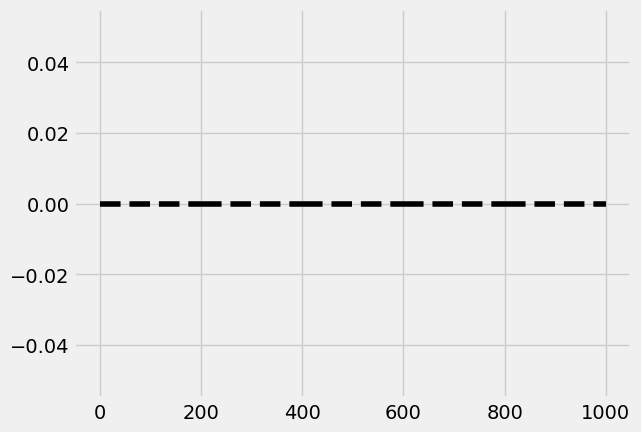

In [7]:
#Part d

# For aluminum
u_aluminum = np.zeros((14,1), dtype=object)
u_aluminum[2:13] = y_aluminum
reaction_forces_aluminum = np.dot(K, u_aluminum)

node_positions = np.array([[i, 0] for i in range(0, 1200, 200)])

# Plot the undeformed structure
for i in range(len(node_positions)-1):
    plt.plot(node_positions[i:i+2, 0], node_positions[i:i+2, 1], 'k--')

# Plot the deformed structure for aluminum (scaled displacements)
deformation_scale = 5.0  # Scale factor for displacements
for i in range(2, 13):
    # Plot the deformed positions of the nodes
    plt.plot(
        [node_positions[i-2, 0], node_positions[i-2, 0] + deformation_scale * u_aluminum[i]],
        [node_positions[i-2, 1], node_positions[i-2, 1] + deformation_scale * u_aluminum[i+1]],
        'b-'
    )

# Plot the reaction forces as vectors
for i in range(2, 13):
    plt.quiver(
        node_positions[i-2, 0], node_positions[i-2, 1],
        reaction_forces_aluminum[i], reaction_forces_aluminum[i+1],
        angles='xy', scale_units='xy', scale=1, color='r'
    )

plt.figure()
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Deformed Structure with Displacements and Reaction Forces')
plt.axis('equal')
plt.grid(True)
plt.show()

'''Was confused about this part for plotting. Hoping to get some feedback and a helpful hint so that I can adjust the code and create the proper plot'''

### 3. Determine cross-sectional area

a. Using aluminum, what is the minimum cross-sectional area to keep total y-deflections $<0.2~mm$?

b. Using steel, what is the minimum cross-sectional area to keep total y-deflections $<0.2~mm$?

c. What are the weights of the aluminum and steel trusses with the
chosen cross-sectional areas?

In [ ]:
import numpy as np

E_steel = 200e9
E_aluminum = 70e9 
F = np.zeros((14, 1))
F[5] = -300 

K[2:13, 2:13] = la.lu(K[2:13, 2:13])[1]

density_steel = 7850
density_aluminum = 2700

max_deflection = 0.2e-3

def calculate_min_cross_sectional_area(E, density):
    for A in np.linspace(1e-8, 1e-4, 10000):  
        K_scaled = K * E * A
        K_reduced = K_scaled[2:13, 2:13]
        F_reduced = F[2:13]

        u = np.linalg.solve(K_reduced, F_reduced)

        total_y_deflection = np.sum(np.abs(u[1::2])) 

        if total_y_deflection < max_deflection:
            weight = density * A * (np.linalg.norm(K_scaled, axis=1).sum())
            return A, weight
    return None, None

min_area_aluminum, weight_aluminum = calculate_min_cross_sectional_area(E_aluminum, density_aluminum)
min_area_steel, weight_steel = calculate_min_cross_sectional_area(E_steel, density_steel)

print("Aluminum minimum area: ",min_area_aluminum) 
print("Aluminum weight: ",weight_aluminum)
print("Steel minimum area: ",min_area_steel)
print("Steel weight: ",weight_steel)

## References

1. <https://en.wikipedia.org/wiki/Direct_stiffness_method>